In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from subprocess import check_output
print(check_output(["ls", "/Users/zakopuro/Code/python_code/kaggle_taitanic/input"]).decode("utf8"))

gender_submission.csv
test.csv
train.csv



In [9]:
TRAIN_PATH = "/Users/zakopuro/Code/python_code/kaggle_taitanic/input/train.csv"
TEST_PATH = "/Users/zakopuro/Code/python_code/kaggle_taitanic/input/test.csv"

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


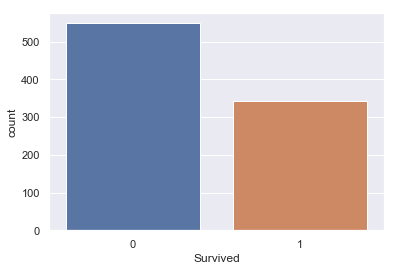

In [18]:
sns.countplot(x="Survived",data=df_train);

In [19]:
#生存確率
print(df_train.Survived.sum()/df_train.Survived.count())

0.3838383838383838


In [20]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

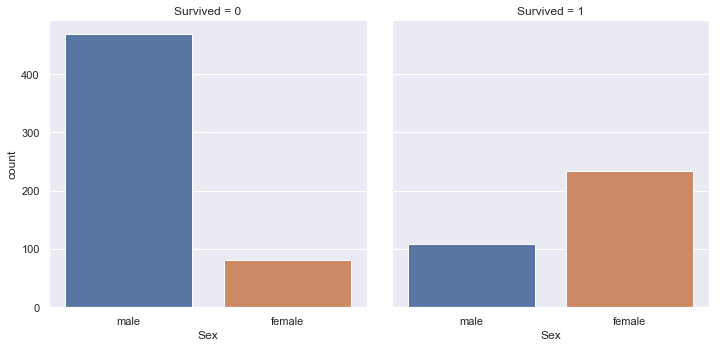

In [21]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

In [23]:
print("% of women survived: " , df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


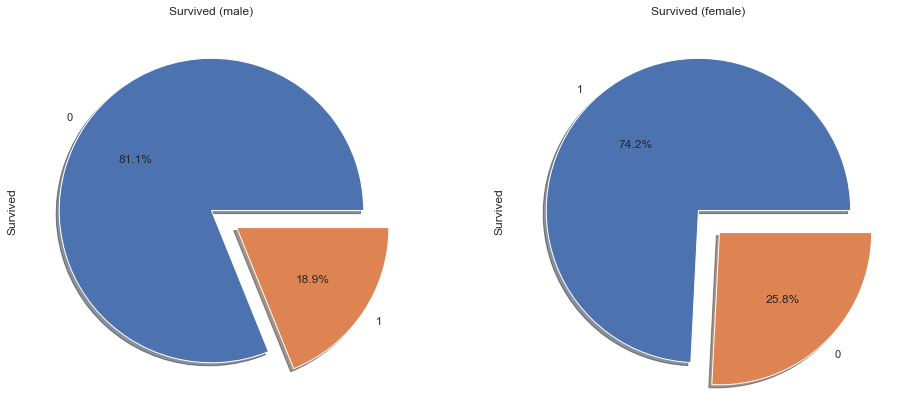

In [24]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [25]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [26]:
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


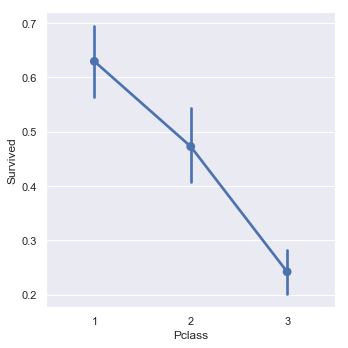

In [27]:
sns.catplot('Pclass','Survived', kind='point', data=df_train);

In [28]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

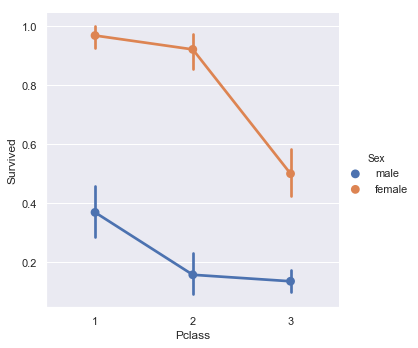

In [29]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df_train);

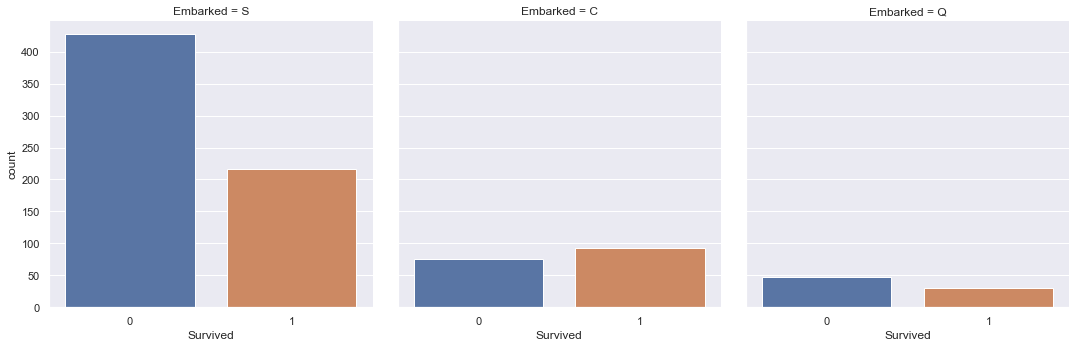

In [30]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

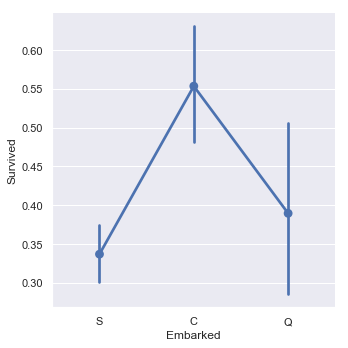

In [31]:
sns.catplot('Embarked','Survived', kind='point', data=df_train);

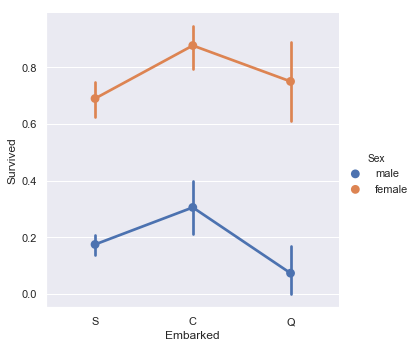

In [32]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df_train);

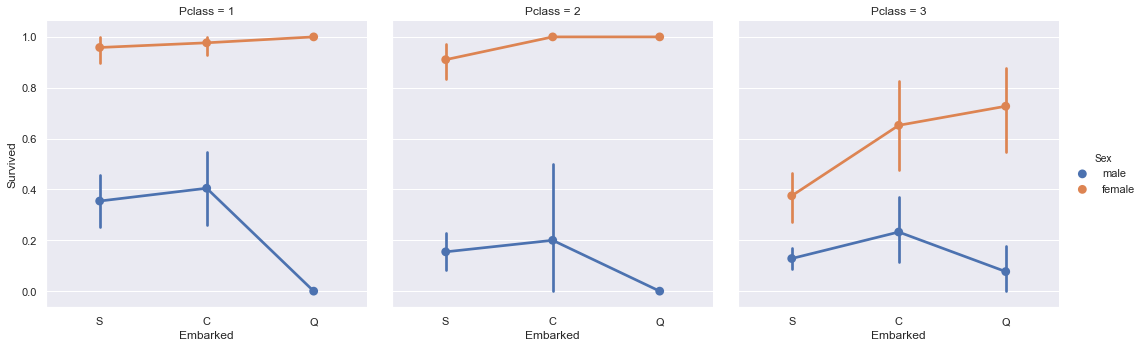

In [33]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train)

In [34]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [35]:
df_test['Survived'] = 0
# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0

In [36]:
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [37]:
print(df_train[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


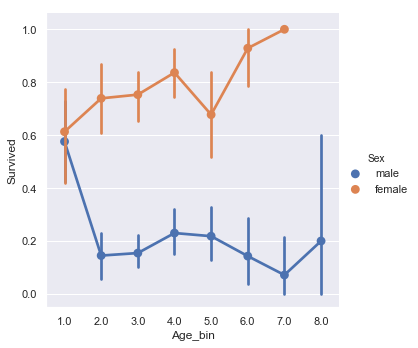

In [38]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data=df_train);

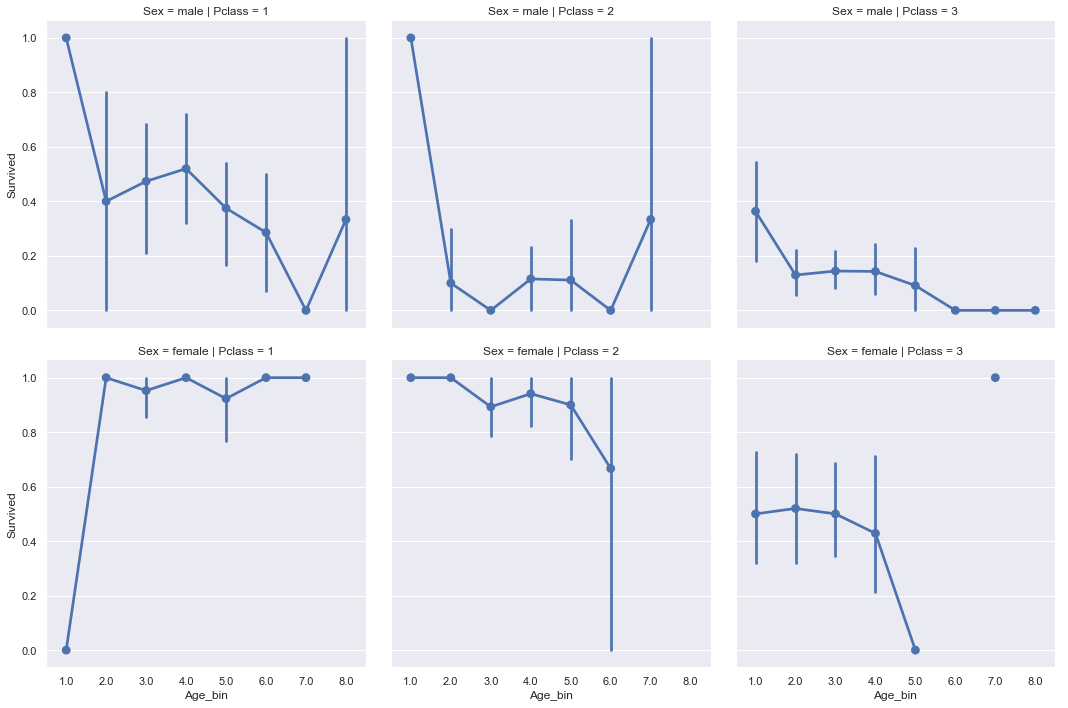

In [39]:
sns.catplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [40]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [41]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

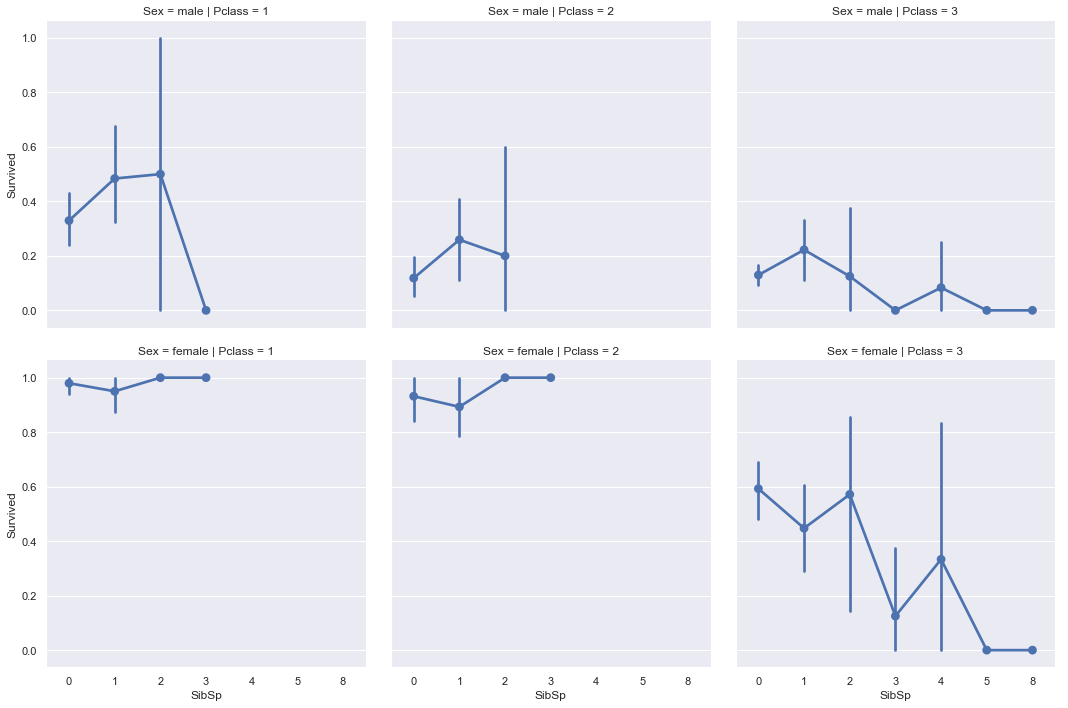

In [42]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [43]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [45]:

df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0

In [46]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

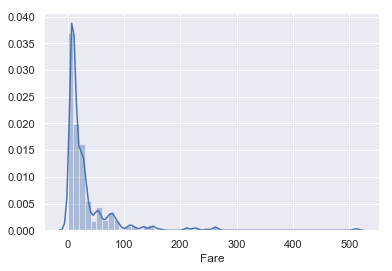

In [47]:
sns.distplot(df_train['Fare']);

In [48]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

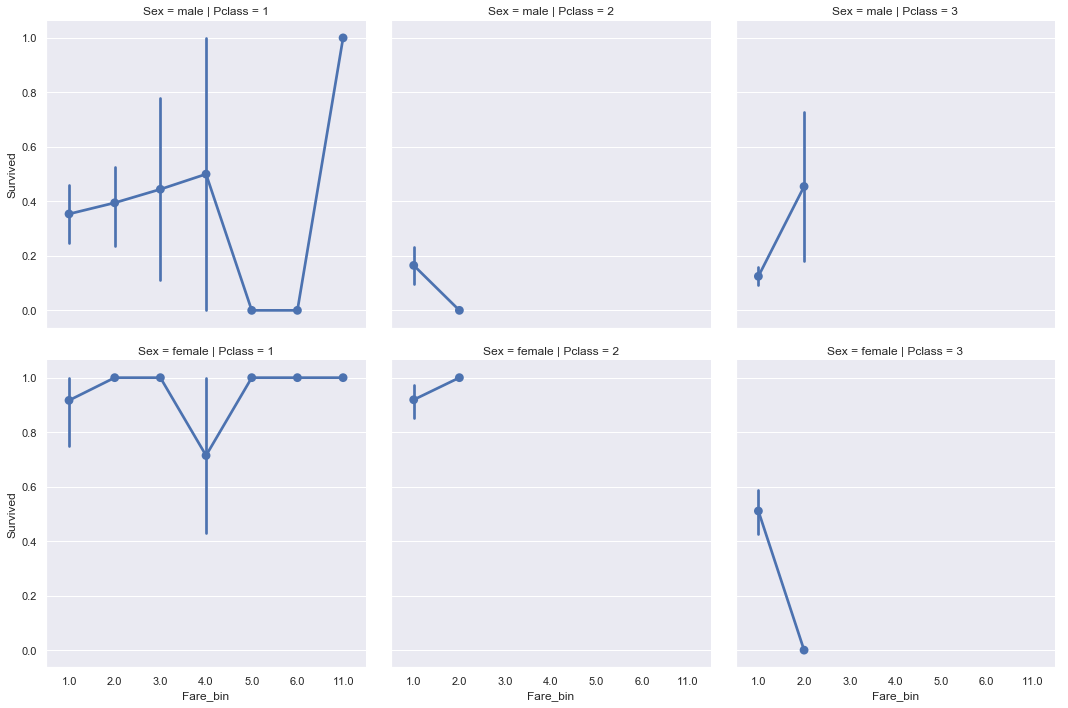

In [49]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train);

In [50]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [51]:
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

In [52]:
df_test.drop(['Survived'],axis=1,inplace=True)

In [53]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

In [54]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [55]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [56]:
df_train_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [57]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [58]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [59]:
df_test_ml.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
5,14.0,0,0,9.2250,1,0,1,0,1
6,30.0,0,0,7.6292,0,1,0,0,1
7,26.0,1,1,29.0000,1,0,1,1,0
8,18.0,0,0,7.2292,0,0,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,1


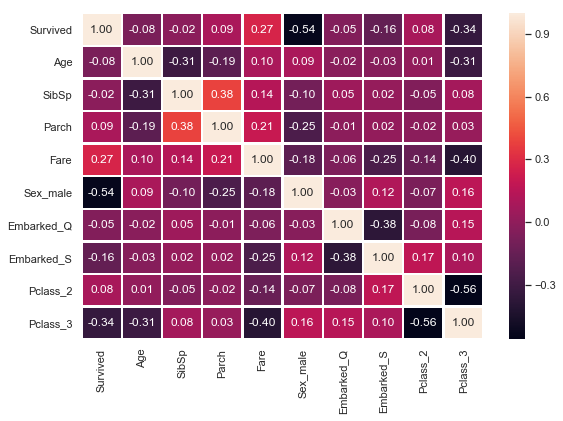

In [60]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

In [63]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

In [64]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[107  16]
 [ 32  60]]
             precision    recall  f1-score   support

          0       0.77      0.87      0.82       123
          1       0.79      0.65      0.71        92

avg / total       0.78      0.78      0.77       215

0.7767441860465116


In [67]:
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

In [68]:
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = pred_all_logreg

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))


[[107  16]
 [ 36  56]]
             precision    recall  f1-score   support

          0       0.75      0.87      0.80       123
          1       0.78      0.61      0.68        92

avg / total       0.76      0.76      0.75       215

0.7581395348837209


In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [71]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

[[71 52]
 [26 66]]
             precision    recall  f1-score   support

          0       0.73      0.58      0.65       123
          1       0.56      0.72      0.63        92

avg / total       0.66      0.64      0.64       215

0.6372093023255814


In [72]:
knn.fit(X_train_all, y_train_all)
pred_all_knn = knn.predict(X_test_all)

In [73]:
sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = pred_all_knn

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

             precision    recall  f1-score   support

          0       0.76      0.82      0.79       123
          1       0.73      0.65      0.69        92

avg / total       0.75      0.75      0.75       215

0.7488372093023256


In [76]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))

             precision    recall  f1-score   support

          0       0.76      0.92      0.83       123
          1       0.85      0.61      0.71        92

avg / total       0.80      0.79      0.78       215

0.786046511627907


In [77]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test_all)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[113  10]
 [ 31  61]]
             precision    recall  f1-score   support

          0       0.78      0.92      0.85       123
          1       0.86      0.66      0.75        92

avg / total       0.82      0.81      0.80       215

0.8093023255813954


In [80]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)


In [81]:
sub_rfc = pd.DataFrame()
sub_rfc['PassengerId'] = df_test['PassengerId']
sub_rfc['Survived'] = pred_all_rfc

In [82]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_sc, y_train_sc)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(y_test_sc, pred_svc))
print(classification_report(y_test_sc, pred_svc))
print(accuracy_score(y_test_sc, pred_svc))

[[116   7]
 [ 34  58]]
             precision    recall  f1-score   support

          0       0.77      0.94      0.85       123
          1       0.89      0.63      0.74        92

avg / total       0.82      0.81      0.80       215

0.8093023255813954


In [84]:
svc.fit(X_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(X_test_all_sc)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = df_test['PassengerId']
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc.csv',index=False)

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81944444 0.80555556 0.76388889 0.875      0.81690141 0.8028169
 0.8028169  0.73239437 0.88732394 0.84507042]
0.8151212832550861


In [87]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.72222222 0.76388889 0.73611111 0.90277778 0.8028169  0.84507042
 0.81690141 0.74647887 0.88732394 0.85915493]
0.808274647887324


In [88]:
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.75       0.77777778 0.75       0.86111111 0.76056338 0.84507042
 0.81690141 0.78873239 0.85915493 0.87323944]
0.8082550860719875


In [89]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

dtree_2 :  0.8082550860719875
rfc     :  0.808274647887324
svc     :  0.8151212832550861
